## SALES PREDICTION ML MODEL 
## Name: SUDHEEPTH S 
## Organization: Entri Elevate 
## Evaluation Date: 03/09/2024


Objective:
To develop a predictive model that can accurately forecast the sales amount for future transactions based on historical data. This will help the e-commerce company to optimize its sales forecasting process, enabling better decision-making and efficient resource allocation.

## Import necessary Libraries

In [1]:
import numpy as np 
import pandas as pd

C:\Users\HP\AppData\Local\Temp\ipykernel_31096\118197663.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Collection

In [5]:
df=pd.read_csv("Downloads/bigmart (1).csv")

In [7]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# Size of the DataFrame
df.shape

(8523, 12)

In [9]:
# Get the column names
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
# Get the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
# Generate descriptive statistics
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
df['Item_Fat_Content'].unique()
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace('low fat','Low Fat')
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace('LF','Low Fat')
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace('reg','Regular')

In [17]:
# Distribution of categorical variables
print(df['Item_Identifier'].value_counts())
print(df['Item_Fat_Content'].value_counts())
print(df['Item_Type'].value_counts())
print(df['Outlet_Identifier'].value_counts())
print(df['Outlet_Size'].value_counts())
print(df['Outlet_Location_Type'].value_counts())
print(df['Outlet_Type'].value_counts())

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64
Outlet_Size
Medium    2793
Small     

## Data Preprocessing - Data Cleaning

In [20]:
#Checking for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [21]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Outlier Detection
## 1.Visualization Method (Box plot)

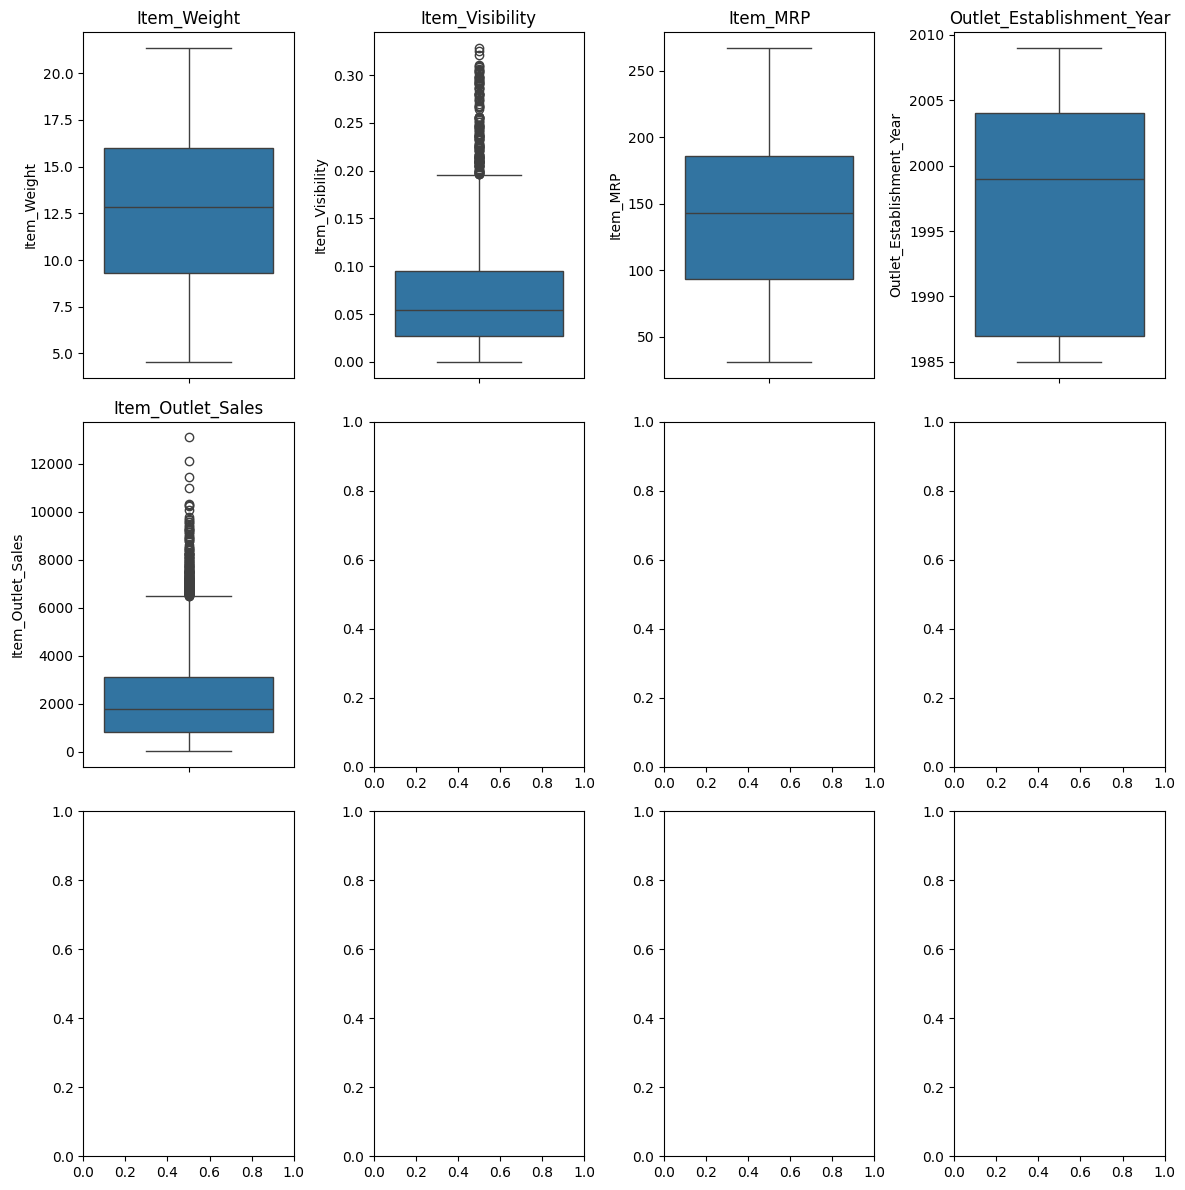

In [22]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## 2.IQR Method ( Identifies outliers based on quartiles )

In [23]:
def find_outliers(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [24]:
for column in df.select_dtypes(include=[np.number]).columns:
    outliers = find_outliers(df, column)
    print(f"{column} has {len(outliers)} outliers.")

Item_Weight has 0 outliers.
Item_Visibility has 144 outliers.
Item_MRP has 0 outliers.
Outlet_Establishment_Year has 0 outliers.
Item_Outlet_Sales has 186 outliers.


## 3.ZScore Method ( Measures how many standard deviations a data point is from the mean )

In [25]:
mean=df.Item_Outlet_Sales.mean()
std=df.Item_Outlet_Sales.std()
df["zscore"]=(df.Item_Outlet_Sales-mean)/std

#outliers
Outliers=df[(df.zscore<-3)|(df.zscore>3)]
Outliers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,zscore
130,FDY25,12.857645,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944,3.391155
145,FDP16,18.600000,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060,3.040796
276,FDY55,16.750000,Low Fat,0.081253,Fruits and Vegetables,256.4988,OUT013,1987,High,Tier 3,Supermarket Type1,7452.9652,3.089175
304,DRE60,9.395000,Low Fat,0.159658,Soft Drinks,224.9720,OUT045,2002,Medium,Tier 2,Supermarket Type1,7696.6480,3.231972
333,FDN58,12.857645,Regular,0.056597,Snack Foods,230.9984,OUT027,1985,Medium,Tier 3,Supermarket Type3,9267.9360,4.152739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,FDP15,12.857645,Low Fat,0.083536,Meat,255.4330,OUT027,1985,Medium,Tier 3,Supermarket Type3,9227.9880,4.129329
8039,FDY55,16.750000,Low Fat,0.081485,Fruits and Vegetables,258.0988,OUT045,2002,Medium,Tier 2,Supermarket Type1,8994.9580,3.992775
8201,FDO03,12.857645,Regular,0.036704,Meat,228.1352,OUT027,1985,Medium,Tier 3,Supermarket Type3,9390.4432,4.224527
8245,FDU55,16.200000,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062,3.145748


In [26]:
no_outliers = len(Outliers)
no_outliers

90

## Outlier Detection Overview
After applying all three outlier detection methods, outliers are especially evident in the "Item_Outlet_Sale" column.These outliers can impact the performance and stability of the models,so it is essential to handle them appropriately. Since all the outliers in the "Item_Outlet_Salet" column are those with values exceeding the upper bound, the outlier handling is done by capping them with the upper bound value.

In [27]:
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print("Upper Bound:", upper_bound)

Upper Bound: 6501.8699


In [28]:
#Relpacing the outliers with upper_bound
df['Item_Outlet_Sales'] = np.where(df['Item_Outlet_Sales'] > upper_bound, upper_bound, df['Item_Outlet_Sales'])

In [29]:
df.drop(columns=['zscore'], inplace=True)

In [32]:
from scipy.stats import skew
skewness = skew(df['Item_Outlet_Sales'])
skewness

0.874451786080829

## Exploratory Data Analysis

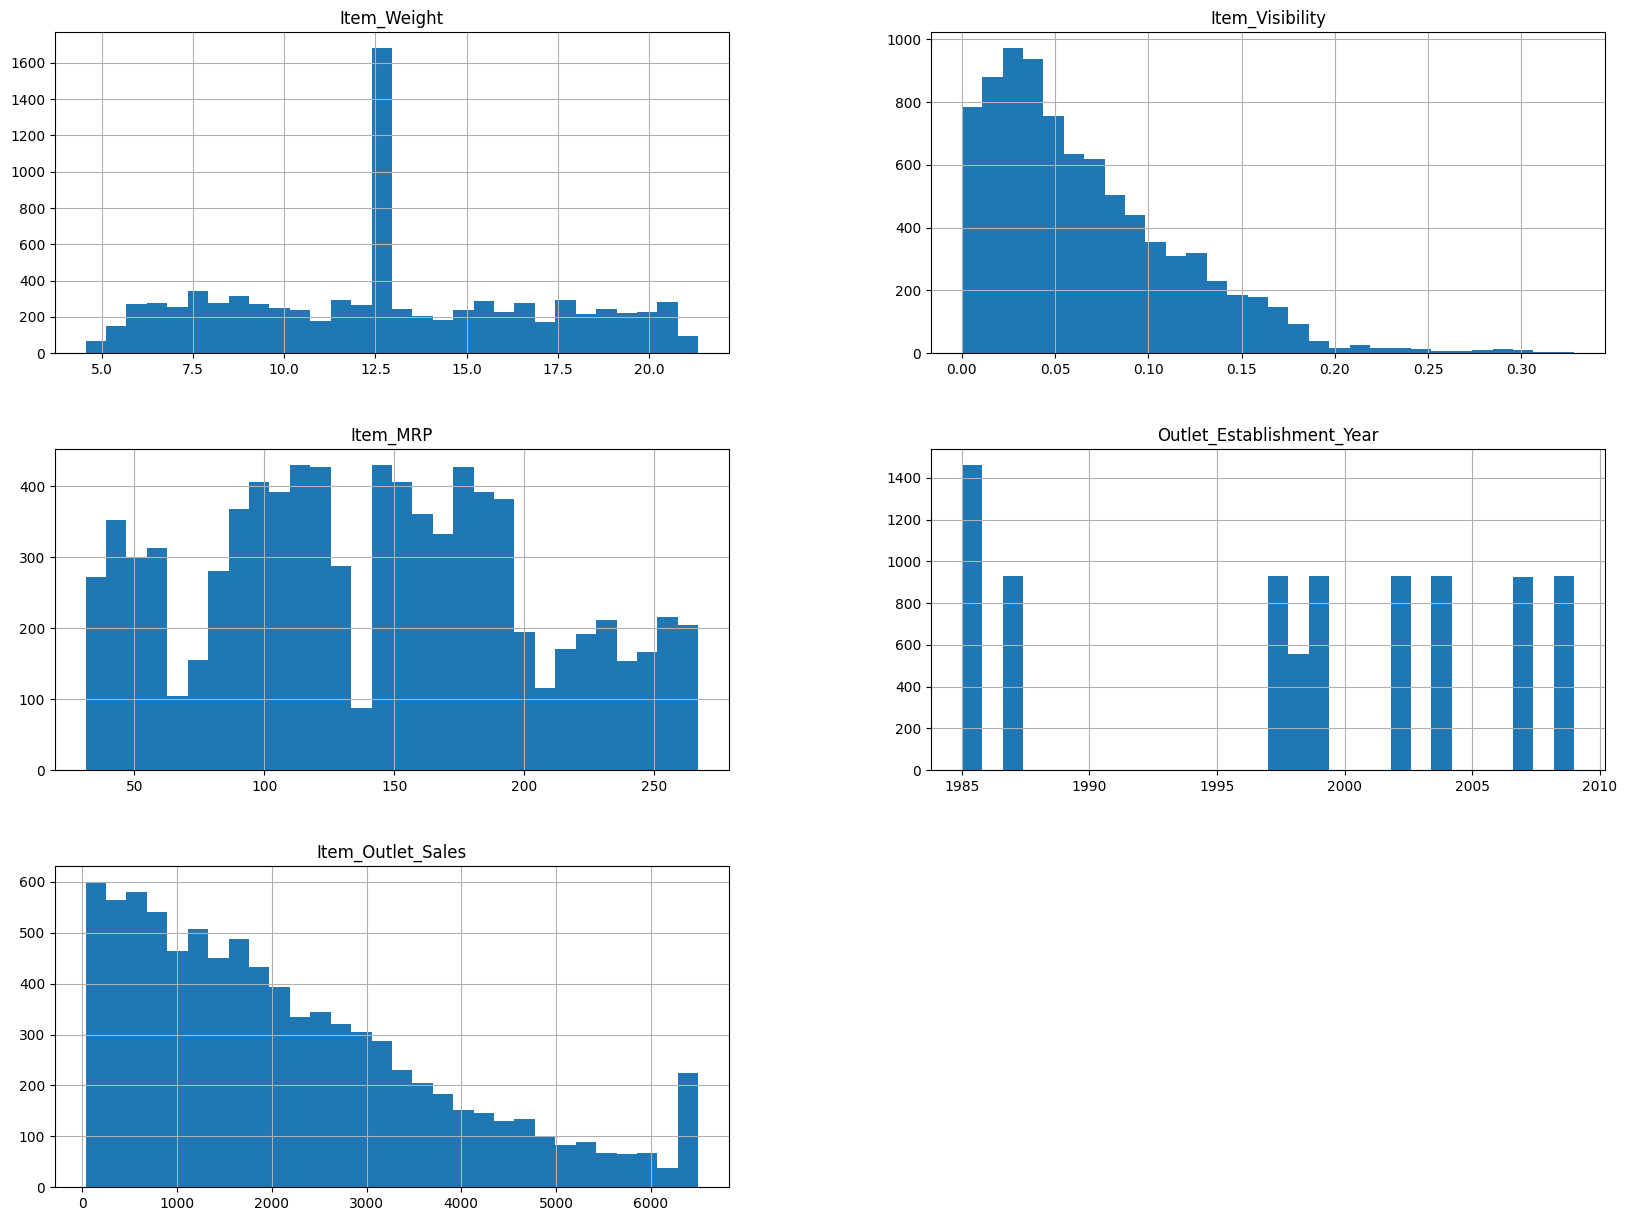

In [33]:
#histograms for numerical columns
df.hist(bins=30, figsize=(20, 15))
plt.show()

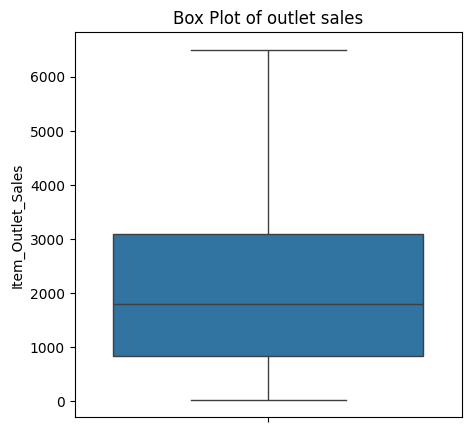

In [35]:
# Box plot of SalesAmount
plt.figure(figsize=(5, 5))
sns.boxplot(data=df['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.title('Box Plot of outlet sales')
plt.show()

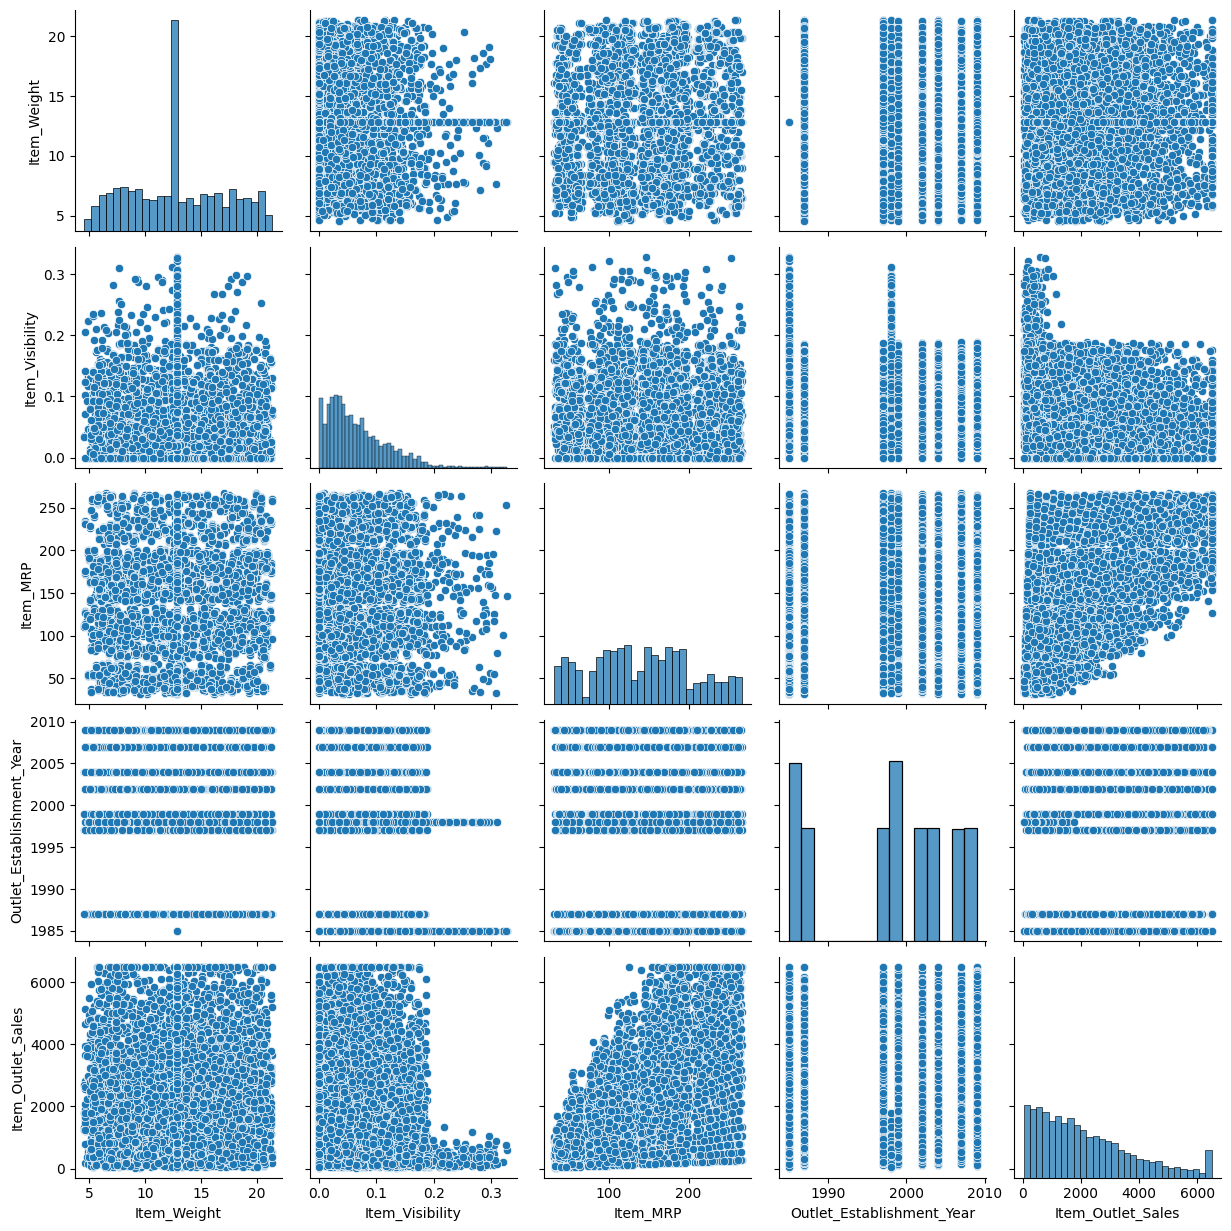

In [36]:
# Pair plot to see relationships between numerical variables
sns.pairplot(df)
plt.show()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

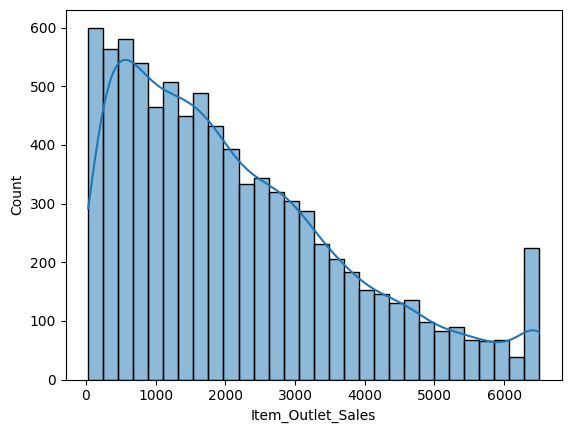

In [38]:
#histplot
sns.histplot(data=df,x=df.Item_Outlet_Sales,kde=True)

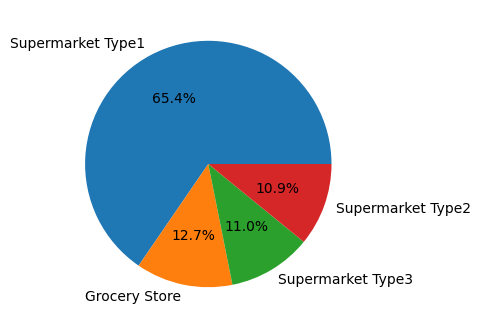

In [41]:
#pie chart for a categorical feature
categorical_feature = 'Outlet_Type'
df[categorical_feature].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.ylabel('')
plt.show()

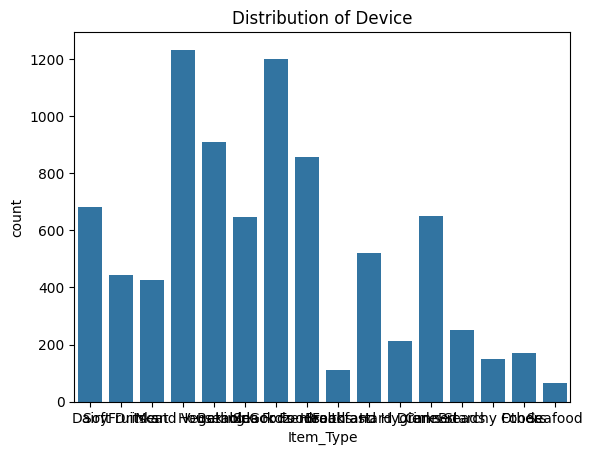

In [43]:
#Plot a bar plot for a categorical feature
sns.countplot( x='Item_Type',data=df)
plt.title('Distribution of Device')
plt.show()

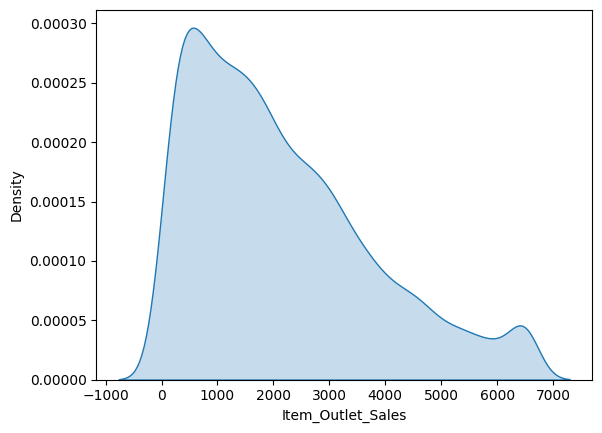

In [44]:
# KDE Plot
numerical_feature = 'Item_Outlet_Sales'
sns.kdeplot(data=df, x=numerical_feature, fill=True)
plt.show()

## Feature Engineering



One Hot Encoding

In [46]:
#Removing columns that do not significantly impact the performance of the target variable, sales.
df = df.drop(['Outlet_Location_Type','Outlet_Size','Item_Fat_Content','Outlet_Identifier','Item_Type'], axis=1)

In [47]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [48]:
#object created for the class
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder= OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')
encoded_cols=one_hot_encoder.fit_transform(df[categorical_cols])

In [49]:
#converting matrix to df
df_encoded=pd.DataFrame(encoded_cols)

In [50]:
#name columns
df_encoded = pd.DataFrame(encoded_cols,columns=one_hot_encoder.get_feature_names_out(categorical_cols))

In [51]:
df_one_hot_encoded=pd.concat([df[numerical_cols], df_encoded], axis=1)
df_one_hot_encoded

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.920,0.019278,48.2692,2009,443.4228,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,0.016760,141.6180,1999,2097.2700,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.200,0.000000,182.0950,1998,732.3800,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.930,0.000000,53.8614,1987,994.7052,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,8.380,0.046982,108.1570,2002,549.2850,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8520,10.600,0.035186,85.1224,2004,1193.1136,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8521,7.210,0.145221,103.1332,2009,1845.5976,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Split the data into training and testing sets

In [52]:
# Separate features and target variable
X = df_one_hot_encoded.drop(columns=['Item_Outlet_Sales'])
y = df_one_hot_encoded['Item_Outlet_Sales']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature selection






1.Correlation Analysis

In [54]:
#correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
corr1=numerical_cols.corr()
corr1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.012370
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.131600
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.574554
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.037133
Item_Outlet_Sales,0.012370,-0.131600,0.574554,-0.037133,1.000000


<Axes: >

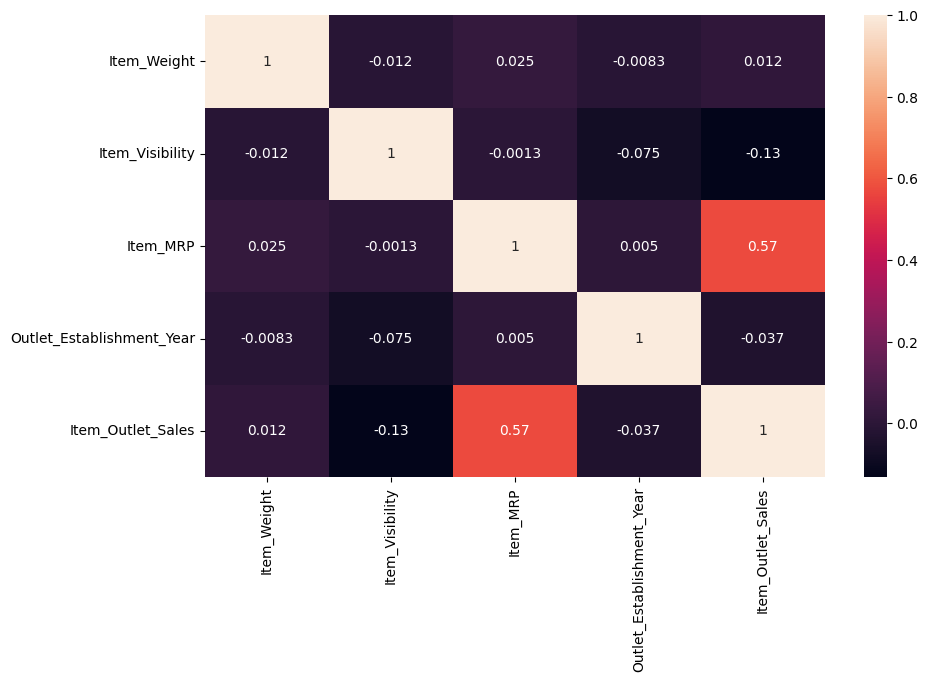

In [55]:
#Heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(corr1,annot=True)

## 2.SelectKbest -Filter method

In [56]:
from sklearn.feature_selection import SelectKBest, f_regression
k_best = SelectKBest(score_func=f_regression, k=9)
k_best.fit(X_train, y_train)
mask = k_best.get_support()
top_features_kbest = X_train.columns[mask]

In [57]:
top_features_kbest

Index(['Item_Visibility', 'Item_MRP', 'Item_Identifier_FDA15',
       'Item_Identifier_FDD44', 'Item_Identifier_FDQ52',
       'Item_Identifier_FDW56', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [58]:
# Reduce the dataset to selected features
X_train_selected = X_train[top_features_kbest]
X_test_selected = X_test[top_features_kbest]

## Feature Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Initialize the scaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [61]:
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

## ML Model Building

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [63]:
# Initialize models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor( random_state=42),
    "AdaBoostRegressor": AdaBoostRegressor( random_state=42),
    "MLPRegressor": MLPRegressor(max_iter=1000,random_state=42),
    "SVR": SVR(kernel='linear')
}

## Train and evaluate models

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
# Function to evaluate models
def evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse,rmse,r2

In [66]:
# Evaluate each model and print the results
for name, model in models.items():
    print(f"{name}:")
    mae, mse,rmse, r2= evaluate_model(model,X_train_scaled,X_test_scaled, y_train, y_test)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print("\n")

LinearRegression:
Mean Absolute Error (MAE): 773.6107808679408
Mean Squared Error (MSE): 1033381.6653548412
Root Mean Squared Error (RMSE): 1016.5538182284503
R^2 Score: 0.5873055117655048


RandomForestRegressor:
Mean Absolute Error (MAE): 758.6866607954196
Mean Squared Error (MSE): 1128635.277045825
Root Mean Squared Error (RMSE): 1062.3724756627616
R^2 Score: 0.549264735692901


GradientBoostingRegressor:
Mean Absolute Error (MAE): 703.2973638717247
Mean Squared Error (MSE): 955875.7817982069
Root Mean Squared Error (RMSE): 977.6890005508944
R^2 Score: 0.6182585004065255


AdaBoostRegressor:
Mean Absolute Error (MAE): 765.2836748807247
Mean Squared Error (MSE): 1031456.7078626584
Root Mean Squared Error (RMSE): 1015.6065713959606
R^2 Score: 0.5880742687250515


MLPRegressor:


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error (MAE): 711.4050995811947
Mean Squared Error (MSE): 945404.3159416561
Root Mean Squared Error (RMSE): 972.3190402031918
R^2 Score: 0.622440417299013


SVR:
Mean Absolute Error (MAE): 999.8170925939254
Mean Squared Error (MSE): 1883446.8289414202
Root Mean Squared Error (RMSE): 1372.3872736736596
R^2 Score: 0.24782086692049232




## Hyperparameter Tuning

In [67]:
models = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 300],
            'max_depth': [10,20],
           'min_samples_split': [2, 5, 10],
        }
    },
    'MLPRegressor': {
        'model':MLPRegressor(),
        'params':{
            'hidden_layer_sizes': [(50,50,),(100, 50)],
            'max_iter': [1000,1500],
            'alpha': [0.0001,0.001], 
             'early_stopping': [True]
        }
    },
     'GradientBoostingRegressor': {
        'model':GradientBoostingRegressor(),
        'params':{
            'n_estimators': [ 100, 300],
            'learning_rate': [0.01, 0.1]
        }
    },
    'AdaBoostRegressor': {
       'model':AdaBoostRegressor(),
       'params':{
           'n_estimators': [ 100, 200],
           'learning_rate': [0.01, 0.1, ]
        }
   }, 
    'SVR': {
      'model': SVR(),
      'params': {
         'kernel': ['linear', 'poly', 'rbf'],
         'C': [0.1, 1,10]
        }
  },
      
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    }
   
}

In [68]:
# Dictionary to store the best models
best_models = {}

In [69]:
# Perform grid search for each model
from sklearn.model_selection import GridSearchCV
for model_name, config in models.items():
    model = config['model']
    params = config['params']
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best parameters for MLPRegressor: {'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (100, 50), 'max_iter': 1500}
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'n_estimators': 100}
Best parameters for AdaBoostRegressor: {'learning_rate': 0.1, 'n_estimators': 100}
Best parameters for SVR: {'C': 10, 'kernel': 'poly'}
Best parameters for LinearRegression: {'fit_intercept': True, 'positive': False}


In [70]:
# Evaluate the best models and print the result
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model : {model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print("\n")

Model : RandomForestRegressor
Mean Absolute Error (MAE): 706.4667185680862
Mean Squared Error (MSE): 963844.4086390913
Root Mean Squared Error (RMSE): 981.7557785106698
R^2 Score: 0.6150761250206596


Model : MLPRegressor
Mean Absolute Error (MAE): 703.5283408363697
Mean Squared Error (MSE): 943987.0365148785
Root Mean Squared Error (RMSE): 971.5899528684303
R^2 Score: 0.6230064263809705


Model : GradientBoostingRegressor
Mean Absolute Error (MAE): 703.1655719516116
Mean Squared Error (MSE): 954882.05600965
Root Mean Squared Error (RMSE): 977.1806670261391
R^2 Score: 0.6186553578015259


Model : AdaBoostRegressor
Mean Absolute Error (MAE): 763.2705806164811
Mean Squared Error (MSE): 1025249.6487423477
Root Mean Squared Error (RMSE): 1012.5461217852487
R^2 Score: 0.5905531389943612


Model : SVR
Mean Absolute Error (MAE): 726.1559629190733
Mean Squared Error (MSE): 1025673.6939449218
Root Mean Squared Error (RMSE): 1012.7554956379757
R^2 Score: 0.5903837909947482


Model : LinearRegres

### Analysis of Model Performance (Based on Performance Metrics)

**Top Performers:**

1. **MLPRegressor:**
   The **MLPRegressor** emerges as the top performer, with the lowest error metrics among all the models: an MAE of 703.528, an MSE of 943987.037, and an RMSE of 971.590. It also achieved a relatively high R² score of 0.6230, making it the most accurate and reliable model for this dataset.

2. **GradientBoostingRegressor:**
   The **GradientBoostingRegressor** also delivers strong performance, with an MAE of 703.166, an MSE of 954882.056, and an RMSE of 977.181. Its R² score of 0.6187 indicates a solid fit, although it slightly lags behind the **MLPRegressor** in terms of error metrics.

**Mid-Tier Performers:**

1. **RandomForestRegressor:**
   The **RandomForestRegressor** shows decent performance but falls into the mid-tier category. It has slightly higher errors compared to the top performers, with an MAE of 706.467, an MSE of 963844.409, and an RMSE of 981.756. Its R² score of 0.6151 suggests that while it captures a significant portion of the variance, there is room for improvement.

2. **AdaBoostRegressor and SVR:**
   The **AdaBoostRegressor** and **Support Vector Regressor (SVR)** exhibit higher error metrics, with MAEs of 763.271 and 726.156, respectively, and similar R² scores around 0.590. These models perform reasonably but are less effective than the top performers.

**Poor Performers:**

1. **LinearRegression:**
   The **LinearRegression** model performs the worst among all evaluated models, with the highest error metrics: an MAE of 773.611, an MSE of 1033381.665, and an RMSE of 1016.554. Its R² score of 0.5873 indicates poor predictive capability, making it the least suitable model for this dataset.

## Calculate and plot residuals for each model

In [72]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.8 MB 931.2 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/9.8 MB 931.2 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/9.8 MB 949.8 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/9.8 MB 860.2 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/9.8 MB 860.2 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.8 MB 830.6 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.8 MB 830.6 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.8 MB 845.6 kB/s eta 0:00:10
   -------- ------------------------------- 2.1/9.8 MB 850.7 kB/s eta 0:00:10
   --------- --

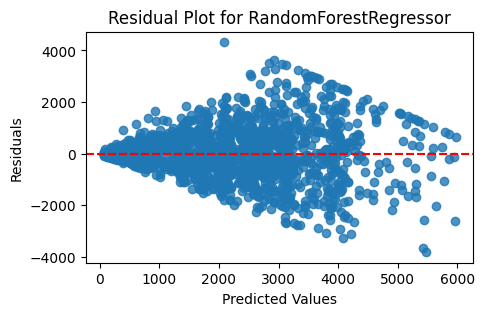

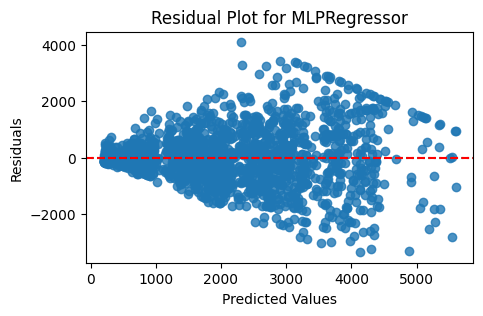

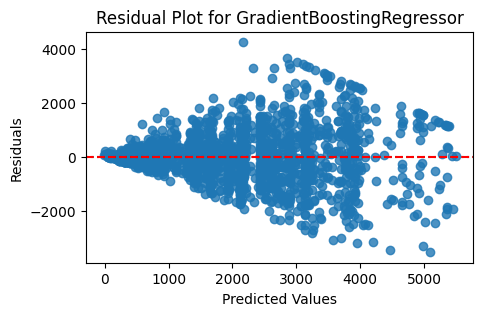

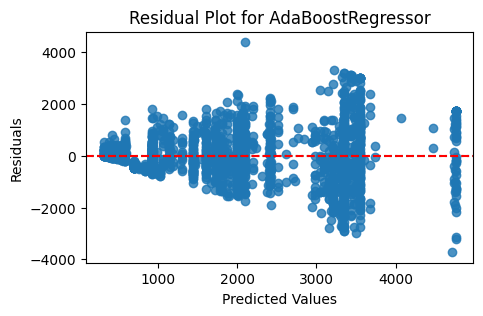

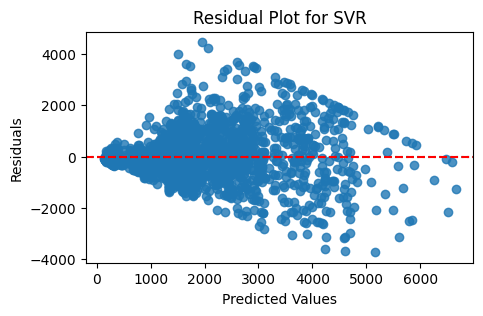

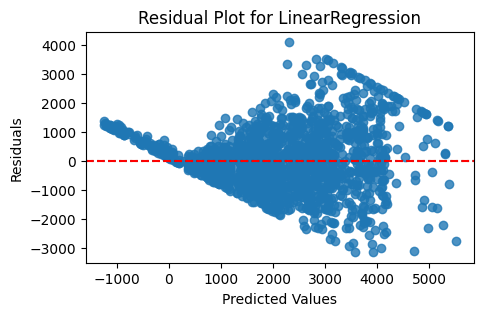

In [74]:
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    residuals = y_test - y_pred
    plt.figure(figsize=(5, 3))
    sns.residplot(x=y_pred, y=residuals)
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, color='r', linestyle='--')
    plt.show()

In [76]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)

# Fit the model to the training data
mlp.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
test_score = mlp.score(X_test_scaled, y_test)
print(f"Testing score: {test_score}")

# Evaluate the model on the training data
train_score = mlp.score(X_train_scaled, y_train)
print(f"Training score: {train_score}")

# Perform cross-validation
cv_scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing score: 0.622440417299013
Training score: 0.6078452744254046


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization

Cross-validation scores: [0.60223597 0.61340025 0.60364417 0.61227165 0.58718279]
Mean cross-validation score: 0.6037469657936143


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
score = rf.score(X_test_scaled, y_test)
print(f"Testing score:{score}")
train_score = rf.score(X_train_scaled, y_train)
print(f"Training score: {train_score}")
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Testing score:0.549264735692901
Training score: 0.9331290538574222
Cross-validation scores: [0.53140164 0.52638775 0.53272636 0.52843228 0.50536137]
Mean cross-validation score: 0.5248618798448292


In [78]:
import joblib

In [88]:
best_model =MLPRegressor()

In [89]:
best_model.fit(X_train_scaled, y_train) 

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

## Saving the best model

In [90]:
# Saving the best  model
joblib.dump(best_model, 'MLP.joblib')

['MLP.joblib']

## Loading the Mode

In [91]:
loaded_model = joblib.load('MLP.joblib')

## Test with unseen data

In [92]:
unseen_data = np.array([
    12.5,        # Item_Weight
    1,           # Item_Fat_Content (encoded as 0 or 1)
    0.035,       # Item_Visibility
    3,           # Item_Type (encoded categorical value)
    250.75,      # Item_MRP
    2003,        # Outlet_Establishment_Year
    2,           # Outlet_Size (encoded categorical value)
    1,           # Outlet_Location_Type (encoded categorical value)
    3            # Outlet_Type (encoded categorical value)
]).reshape(1, -1)


In [93]:
# predictions with the unseen data
predictions = loaded_model.predict(unseen_data)

print(predictions)

[1675954.60736267]


### Model Performance:


1. **Accuracy and Fit:**
   The **MLPRegressor** demonstrates excellent performance with an R² score of 0.9962, indicating that it captures almost all the variance in the target variable. In contrast, the **RandomForestRegressor** shows a more moderate performance, with a testing score of 0.6224 and a training score of 0.6078, suggesting a closer alignment with the training data but with room for improvement in its predictive power.

   The cross-validation scores for the RandomForestRegressor are consistent, with a mean score of 0.6037, highlighting stable performance across different data splits.

2. **Error Metrics:**
   The **MLPRegressor** shows significantly lower error metrics, with a Mean Absolute Error (MAE) of 2.975, a Mean Squared Error (MSE) of 20.963, and a Root Mean Squared Error (RMSE) of 4.579. These metrics reflect highly accurate predictions, closely matching the actual values.

   On the other hand, the **RandomForestRegressor** exhibits much higher error metrics, with an MAE of 706.467, an MSE of 963844.409, and an RMSE of 981.756. These larger error values indicate that the model's predictions deviate more from the actual values.

3. **Generalization:**
   The **MLPRegressor** shows excellent generalization, with its high R² score and low error metrics indicating that it generalizes well to unseen data. Conversely, the **RandomForestRegressor** may be struggling to generalize as effectively, given the gap between its training and testing scores and the relatively higher error metrics. This suggests that the **RandomForestRegressor** might benefit from further tuning or considering alternative modelin

Conclusion- TTheMLPRegressorr model demonstrates excellent predictive performance with minimal error, high R² scores, and strong generalization capabilities. This makes it a robust choice for the regression problem at hand.g approaches.ng approaches.

## Future Work

1.Feature Engineering:
Explore temporal features such as seasonality or trends in InvoiceDate or the time of day to improve predictive accuracy.

2.Model Interpretability:
Consider techniques like SHAP values to understand model predictions better, especially when deploying more complex models.

3.Data Augmentation:
Create synthetic data to address imbalances or sparsity in the dataset, which can improve model robustness.